In [9]:
import pandas as pd
import pandlas
import os

In [10]:
df = pd.read_csv("https://data.nationalgrideso.com/backend/dataset/88313ae5-94e4-4ddc-a790-593554d8c6b9/resource/f93d1835-75bc-43e5-84ad-12472b180a98/download/df_fuel_ckan.csv")

df.head()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00+00:00,8427.0,15038.0,7098.0,270.0,246.0,2501.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.7,22.7,1.5,69.9
1,2009-01-01 00:30:00+00:00,8560.0,15098.0,7086.0,250.0,245.0,2479.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.2
2,2009-01-01 01:00:00+00:00,8529.0,15083.0,7072.0,227.0,246.0,2444.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.4,70.3
3,2009-01-01 01:30:00+00:00,8367.0,15012.0,7063.0,211.0,246.0,2416.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.2
4,2009-01-01 02:00:00+00:00,8334.0,14970.0,7051.0,196.0,246.0,2344.0,0.0,0.0,0.0,...,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.3,70.3


,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00+00:00,8427.0,15038.0,7098.0,270.0,246.0,2501.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.7,22.7,1.5,69.9
1,2009-01-01 00:30:00+00:00,8560.0,15098.0,7086.0,250.0,245.0,2479.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.2
2,2009-01-01 01:00:00+00:00,8529.0,15083.0,7072.0,227.0,246.0,2444.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.4,70.3
3,2009-01-01 01:30:00+00:00,8367.0,15012.0,7063.0,211.0,246.0,2416.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.2
4,2009-01-01 02:00:00+00:00,8334.0,14970.0,7051.0,196.0,246.0,2344.0,0.0,0.0,0.0,...,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.3,70.3


In [11]:
df.set_index('DATETIME',inplace=True)
df.index = pd.to_datetime(df.index)

In [12]:
day = df.loc["2023-02-05":"2023-02-06"]

<AxesSubplot:xlabel='DATETIME'>

<AxesSubplot:xlabel='DATETIME'>

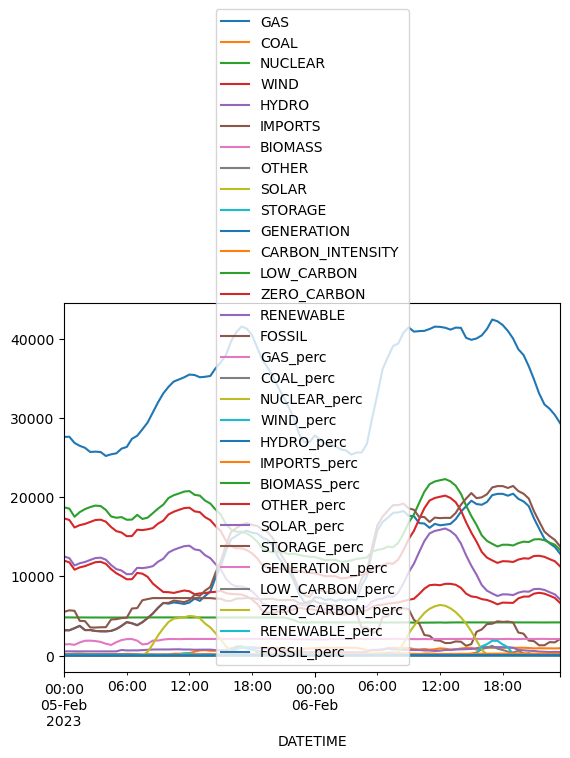

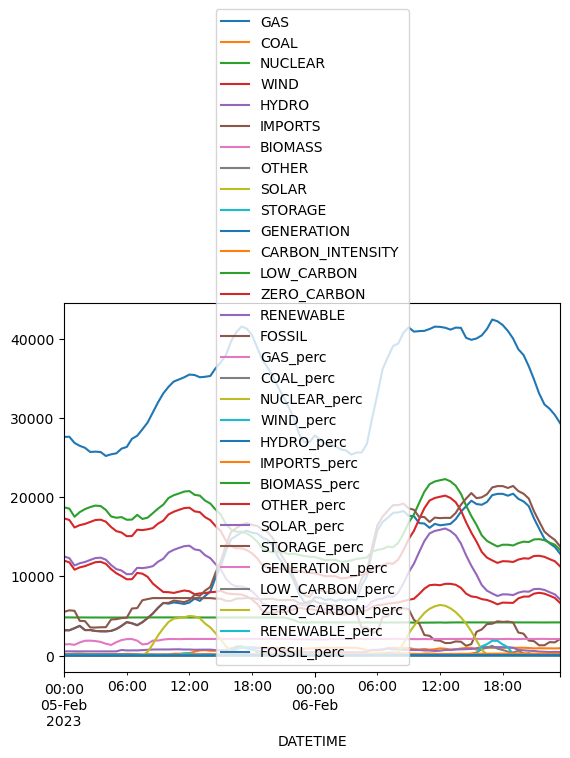

In [13]:
day.plot()

In [14]:
from pandlas.SqlRace import initialise_sqlrace
initialise_sqlrace()
    
litedbdir = r'c:\temp\PanTLAS\temp.ssndb'
pathToFile = r'c:\ssn2\Energy.ssn2'
pathToFile = os.path.abspath(pathToFile)
output_dir = os.path.dirname(pathToFile)

# import the .NET objects 
from pandlas.session_frame import SessionManager, SessionKey, DateTime
#  Create new session
connectionString = rf"DbEngine=SQLite;Data Source={litedbdir};"
sessionManager = SessionManager.CreateSessionManager()
sessionKey = SessionKey.NewKey()
sessionIdentifier = os.path.basename(pathToFile).strip(".ssn2")
sessionDate = DateTime.Now
eventType = 'SessionFrame'
clientSession = sessionManager.CreateSession(connectionString, sessionKey, sessionIdentifier,
                                             sessionDate, eventType)
session = clientSession.Session



In [16]:
# Add lap at start of session
from pandlas.session_frame import Lap, Byte
timestamp = day.index[0]
timestamp64 = ((timestamp.hour * 3600 + timestamp.minute * 60 + timestamp.second) * 1e9 +
         timestamp.microsecond * 1e3 + timestamp.nanosecond)
newlap = Lap(int(timestamp64), 0, Byte(0), f"Lap 1", True)
session.Laps.Add(newlap)

In [17]:
day.atlas.to_ssn2(session=session)

Creating channels: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 2591.97it/s]

Adding data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 45.93it/s]

0
0


In [18]:
# don't forget to close the session
clientSession.Close()

In [19]:
# export session to a single file ssn2
from pandlas.session_frame import Ssn2SessionExporter
exporter = Ssn2SessionExporter()
exporter.Export(sessionKey.ToString(), litedbdir, output_dir)

In [20]:
# Open ATLAS, open the workbook, and load the session.

keys = [sessionKey.ToString()]
connection_strings = [connectionString]
# Building connection strings list for LoadingSQLRaceSession

from MAT.Atlas.Automation.Client.Services import ApplicationServiceClient, WorkbookServiceClient, SetServiceClient
from pandlas.automation import open_atlas, load_session

app = ApplicationServiceClient()
open_atlas(app)

workbookServiceClient = WorkbookServiceClient()
workbookServiceClient.ReplaceWorkbook(r"D:\2023R1 Demo\Energy.wbkx")

Waiting for ATLAS to open
Waiting for ATLAS to open

ATLAS Client connected.
ATLAS version: 11.2.1.199

ATLAS Client connected.
ATLAS version: 11.2.1.199


In [21]:
setsList = workbookServiceClient.GetSets()
load_session(app, setsList[0].Id, keys, connection_strings)

IndexError: array index out of range

IndexError: array index out of range